In [1]:
import ExTRA as ex
import numpy as np
import matplotlib.pyplot as plt

ExTRA  imported correctly


Sabines fit: 
P: 1050.740 
e: 0.237 
om: 1.307 
i: 1.253 
Om: 1.510 
T0: 2556746.314 
a: 32.828

In [2]:
#325.36863468 -77.38946228 47.17    66.41    -239.10

In [3]:
hip_ad,t_hip=ex.hip_read("data/nu_oct/HIP107089_esa.d")

In [4]:
def fitter(theta,hip_ad):
    P,e,om,i,Om,T0,a=theta[:7]
    correction=theta[7:]

    L_h=ex.L_hip(hip_ad,correction,P,e,om,i,Om,T0,a)

    return L_h

In [5]:
from scipy.optimize import minimize
P_g=1050.740
e_g=0.237
om_g=1.307
i_g=1.253
Om_g=1.510
T0_g=ex.J1991()
a_g=32.828

kep_g=np.array([P_g,e_g,om_g,i_g,Om_g,T0_g,a_g])
correction_g=np.array([7,-2,-2,-14,-2])
x0=np.concatenate([kep_g,correction_g])


orbbnds=(P_g-100,P_g+100),(0,0.95),(-np.pi,np.pi),(0,2*np.pi),(-np.pi,np.pi),(T0_g-10000,T0_g+10000),(0,100)
standbnds=(-20,20),(-20,20),(-20,20),(-20,20),(-20,20)
#v0_bnds=(v0_g-100,v0_g+100),
bnds=orbbnds+standbnds#+v0_bnds

In [6]:
#HIP 107089
hip_sss=np.array([325.36863468,-77.38946228,47.17,66.41,-239.10]) 
gaia_sss=np.array([325.3689251479717,-77.39000876162,51.5172,68.656,-250.044])

	
hip_ad_transformed=ex.hip_with_gaia(hip_ad,hip_sss,gaia_sss)

In [7]:
fit=minimize(fitter,x0,args=(hip_ad_transformed),bounds=bnds,tol=1e-5,method="Nelder-mead",options={"maxiter":1e5})
print(fit)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 468.09834474272054
             x: [ 1.066e+03  1.726e-01  1.742e+00  1.266e+00  1.442e+00
                  2.444e+06  3.140e+01  3.385e+00 -2.830e+00 -6.276e+00
                 -1.874e+01  7.944e+00]
           nit: 8691
          nfev: 11900
 final_simplex: (array([[ 1.066e+03,  1.726e-01, ..., -1.874e+01,
                         7.944e+00],
                       [ 1.066e+03,  1.726e-01, ..., -1.874e+01,
                         7.944e+00],
                       ...,
                       [ 1.066e+03,  1.726e-01, ..., -1.874e+01,
                         7.944e+00],
                       [ 1.066e+03,  1.726e-01, ..., -1.874e+01,
                         7.944e+00]], shape=(13, 12)), array([ 4.681e+02,  4.681e+02, ...,  4.681e+02,  4.681e+02],
                      shape=(13,)))


array([1.08388341e+03, 1.44307984e-01, 1.53651210e+00, 1.27444288e+00,
       1.45208645e+00, 2.44251773e+06, 3.24508039e+01])

In [8]:
kep=fit.x[:7]
corr=fit.x[7:]
t_model=np.linspace(t_hip[-1],t_hip[-1]+fit.x[0],1000)

sabine=ex.orbit(*x0[:7],t_model)
orb=ex.orbit(*kep,t_hip)

residuals=ex.abs_res(hip_ad[-2],corr,np.zeros(5),hip_ad)
res_final=residuals-(hip_ad[0]*orb[0]+hip_ad[1]*orb[1])
o=ex.res_to_orbit(res_final,hip_ad,kep)


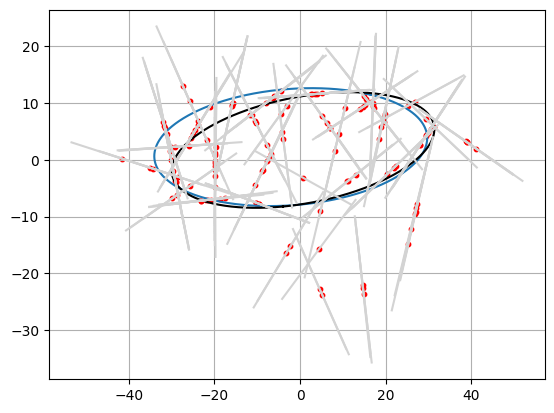

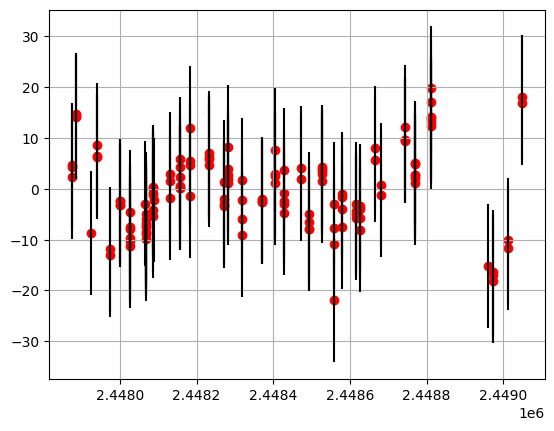

In [9]:
orb_mod=ex.orbit(*kep,t_model)
plt.plot(*sabine)
plt.plot(*orb_mod,c="k")
ex.plot_hip_err(*o,s=10)
plt.grid()
plt.show()
plt.scatter(t_hip,res_final,c="r")
plt.errorbar(t_hip,res_final,hip_ad[-1],linestyle="",c="k")
plt.grid()
plt.show()

In [10]:
hip_ad[-1]

array([12.19, 12.2 , 12.2 , 12.19, 12.2 , 12.19, 12.2 , 12.2 , 12.2 ,
       12.19, 12.19, 12.19, 12.2 , 12.19, 12.2 , 12.19, 12.2 , 12.2 ,
       12.2 , 12.2 , 12.19, 12.22, 12.22, 12.2 , 12.22, 12.21, 12.22,
       12.22, 12.22, 12.21, 12.22, 12.2 , 12.21, 12.19, 12.21, 12.19,
       12.2 , 12.19, 12.22, 12.22, 12.22, 12.21, 12.19, 12.23, 12.19,
       12.21, 12.19, 12.19, 12.2 , 12.19, 12.2 , 12.21, 12.22, 12.21,
       12.19, 12.2 , 12.19, 12.21, 12.2 , 12.2 , 12.21, 12.19, 12.2 ,
       12.19, 12.2 , 12.19, 12.19, 12.19, 12.2 , 12.2 , 12.19, 12.19,
       12.21, 12.2 , 12.22, 12.19, 12.22, 12.22, 12.2 , 12.21, 12.19,
       12.2 , 12.2 , 12.19, 12.19, 12.19, 12.19, 12.21, 12.19, 12.22,
       12.2 , 12.23, 12.19, 12.19, 12.2 , 12.2 , 12.19, 12.2 , 12.2 ,
       12.21, 12.23, 12.22, 12.22, 12.22, 12.22, 12.22, 12.23, 12.2 ,
       12.2 , 12.19, 12.2 , 12.22, 12.2 , 12.19, 12.19, 12.19, 12.2 ,
       12.21, 12.2 , 12.2 , 12.19, 12.19, 12.24, 12.21, 12.23, 12.24,
       12.22, 12.24,

# Combined fit

In [11]:
parallax=44.37 #from HIP data

In [12]:
rv=ex.RV_read("data/nu_oct/nu_oct_RV_1.vels.vels")

In [22]:
def combined_fitter(theta,hip_ad,rvs,parallax):
    P,e,om,i,Om,T0,a=theta[:7]
    correction=theta[7:12]
    v0=theta[12]
    
    
    
    
    #print(correction)
    #print(v0)

    t,data,err=rvs

    L_h=ex.L_hip(hip_ad,correction,P,e,om,i,Om,T0,a,s_hip=5)#s=5 11
    L_rv=ex.L_RVs_comb(t,data,err,23,v0,P,e,om,i,T0,a,parallax+correction[2]) #s=23

    
    
    return L_h+L_rv

In [23]:
P_g=1050.740
e_g=0.237
om_g=1.307
i_g=1.253
Om_g=1.510
T0_g=ex.J1991()
a_g=32.828
v0_g=-6050



kep_g=np.array([P_g,e_g,om_g,i_g,Om_g,T0_g,a_g])
correction_g=np.array([7,-2,-2,-14,-2])
#correction_g=np.zeros(5)
x0=np.concatenate([kep_g,correction_g])
x0=np.append(x0,v0_g)





orbbnds=(P_g-1000,P_g+1000),(0,0.95),(-np.pi,np.pi),(-np.pi,np.pi),(-np.pi,np.pi),(T0_g-3*P_g,T0_g+3*P_g),(0,100)
standbnds=(-20,20),(-20,20),(-20,20),(-20,20),(-20,20)
v0_bnds=(v0_g-1000,v0_g+1000),
bnds=orbbnds+standbnds+v0_bnds

In [24]:
fit_combined=minimize(combined_fitter,x0,args=(hip_ad,rv,parallax),bounds=bnds,tol=1e-7,method="Nelder-mead",options={"maxiter":1e5})
print(fit_combined)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 880.3112537812451
             x: [ 1.050e+03  2.366e-01 ... -2.245e+00 -6.041e+03]
           nit: 3885
          nfev: 5521
 final_simplex: (array([[ 1.050e+03,  2.366e-01, ..., -2.245e+00,
                        -6.041e+03],
                       [ 1.050e+03,  2.366e-01, ..., -2.245e+00,
                        -6.041e+03],
                       ...,
                       [ 1.050e+03,  2.366e-01, ..., -2.245e+00,
                        -6.041e+03],
                       [ 1.050e+03,  2.366e-01, ..., -2.245e+00,
                        -6.041e+03]], shape=(14, 13)), array([ 8.803e+02,  8.803e+02, ...,  8.803e+02,  8.803e+02],
                      shape=(14,)))


In [25]:
kep=fit_combined.x[:7]
corr=fit_combined.x[7:12]
t_model=np.linspace(t_hip[-1],t_hip[-1]+fit_combined.x[0],1000)
orb=ex.orbit(*kep,t_hip)

residuals=ex.abs_res(hip_ad[-2],corr,np.zeros(5),hip_ad)
res_final=residuals-(hip_ad[0]*orb[0]+hip_ad[1]*orb[1])
o=ex.res_to_orbit(res_final,hip_ad,kep)


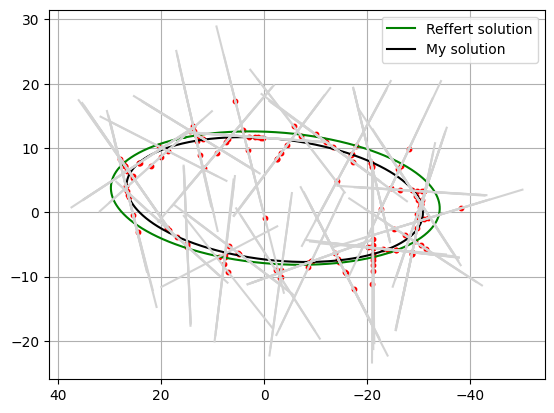

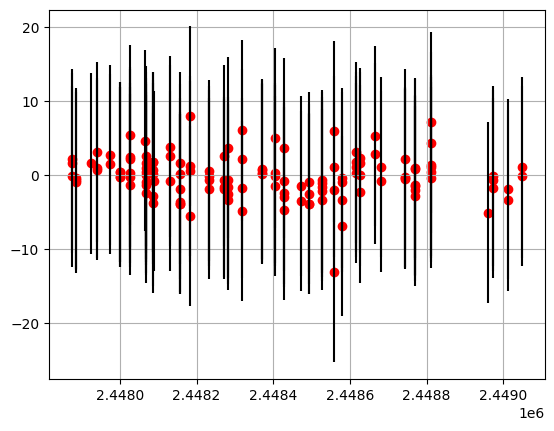

In [26]:
orb_mod=ex.orbit(*kep,t_model)

plt.plot(*sabine,c="g",label="Reffert solution")
plt.plot(*orb_mod,c="k",label="My solution")
ex.plot_hip_err(*o,s=10)
plt.gca().invert_xaxis()
plt.legend()
plt.grid()
plt.show()
plt.scatter(t_hip,res_final,c="r")
plt.errorbar(t_hip,res_final,hip_ad[-1],linestyle="",c="k")
plt.grid()
plt.show()



In [27]:
t_rvmod=np.linspace(rv[0][0],rv[0][0]+2*P_g,1000)

In [28]:
rvcombined_mod=ex.RV_comb(fit_combined.x[-1],*fit_combined.x[:4],*fit_combined.x[5:7],parallax+fit_combined.x[-4],t_rvmod)
rvcombined=ex.RV_comb(fit_combined.x[-1],*fit_combined.x[:4],*fit_combined.x[5:7],parallax+fit_combined.x[-4],rv[0])

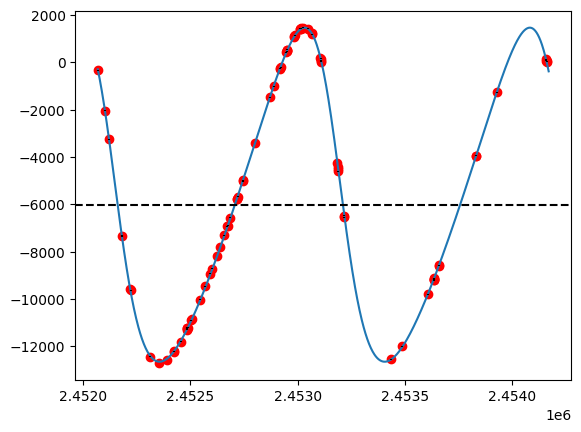

In [29]:
plt.plot(t_rvmod,rvcombined_mod)
plt.scatter(rv[0],rv[1],c="r")
plt.errorbar(rv[0],rv[1],rv[2],linestyle="",c="k")
plt.axhline(fit_combined.x[-1],linestyle="--",c="k")
plt.show()

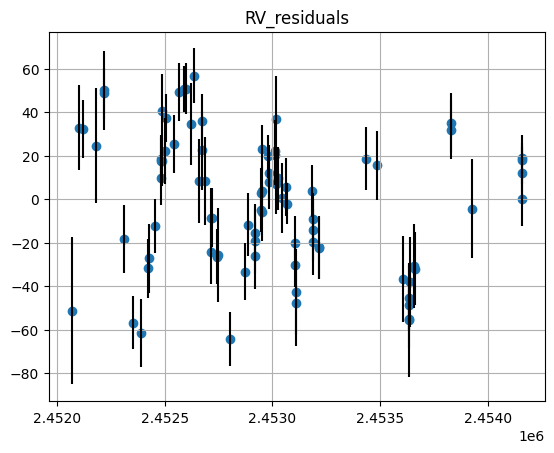

In [30]:
plt.title("RV_residuals")
plt.scatter(rv[0],rv[1]-rvcombined)
plt.errorbar(rv[0],rv[1]-rvcombined,rv[2],linestyle="",c="k")
plt.grid()
plt.show()